# Import Packages, Training Data, and Check Target Feature Distribution

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

%matplotlib inline

In [2]:
data_path = 'C:/Users/akipp/Documents/GitHub/Data/Insurance-Demo-Data/'
train_data_name = 'exercise_40_train.csv'

In [3]:
train_data = pd.read_csv(data_path + train_data_name)

In [4]:
print(train_data.shape)
print(train_data.dtypes.value_counts())
train_data.head()

(40000, 101)
float64    86
object     12
int64       3
dtype: int64


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,$-908.650758424405,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,5-10 miles,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,$-1864.9622875143,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10 miles,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,$-543.187402955527,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,$-182.626380634258,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.275406,90.76

The response variable is imbalanced but there aren't any missing labels. The data imbalance should be addressed before model training because most models expect balanced labels and it may negatively impact the model's ability to learn correct patterns in the data.

In [5]:
print(train_data['y'].value_counts(dropna = False))
print(train_data['y'].value_counts(normalize = True, dropna = False))

0    34197
1     5803
Name: y, dtype: int64
0    0.854925
1    0.145075
Name: y, dtype: float64


# Checking Values to Determine Feature Type

In [6]:
# Since the features x59 and x98 both are integer features with max and min values of 1 and 0 respectively, they 
# should be handled with the categorical features.
train_data[train_data.columns[train_data.dtypes == 'int64']].describe()

,y,x59,x98
count,40000.000000,40000.000000,40000.000000
mean,0.145075,0.099650,0.497650
std,0.352181,0.299537,0.500001
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [7]:
train_data[train_data.columns[train_data.dtypes == 'object']].head()

,x3,x7,x19,x24,x31,x33,x39,x60,x65,x77,x93,x99
0,Wed,0.0062%,$-908.650758424405,female,no,Colorado,5-10 miles,August,farmers,mercedes,no,yes
1,Friday,0.0064%,$-1864.9622875143,male,no,Tennessee,5-10 miles,April,allstate,mercedes,no,yes
2,Thursday,-8e-04%,$-543.187402955527,male,no,Texas,5-10 miles,September,geico,subaru,no,yes
3,Tuesday,-0.0057%,$-182.626380634258,male,no,Minnesota,5-10 miles,September,geico,nissan,no,yes
4,Sunday,0.0109%,$967.007090837503,male,yes,New York,5-10 miles,January,geico,toyota,yes,yes


In [8]:
# x7 is a percentage amount which needs to be converted to a standard float value; contains some values in 
# scientific notation which needs to be accounted for
# Will need to be replicated in modeling.
def percent_to_float(x):
    x_split = x.strip('%').split('e')
    if len(x_split) == 2:
        return(float(x_split[0]) * 10**float(x_split[1]))
    else:
        return(float(x_split[0]))
    
train_data['x7'] = train_data.x7.apply(percent_to_float)


# x19 is a dollar amount which needs to be 
train_data['x19'] = train_data.x19.apply(lambda x: float(x.strip('$')))

In [9]:
# Do any of the continuous features have VERY few distinct values which would suggest it might be a 
# categorical or ordinal feature? The threshold of 100 (semi-arbitrarily chosen) is selected to give 
# an idea of which features might be categorical or ordinal, and where to begin looking further.
for feat in train_data.columns[train_data.dtypes == 'float64']:
    if len(train_data[feat].unique()) <= 100:
        print('Feature {} has {} distinct values.'.format(feat, len(train_data[feat].unique())))

Feature x79 has 3 distinct values.


In [10]:
# Feature x79 only has 3 values to start with initially, but since one is nan it is just binary and 
# should be handled with the categorical features.
train_data.x79.unique()

array([ 1., nan,  0.])

# Checking Missing Values in Features

### Check Categorical Features Distinct Categories
- Features x59 and x98 have no missing values and are binary so nothing needs to be done to them for data cleaning.
 - Feature x3 should have its values consolidated to just have a single value for each day of the week.
 - Feature x24 might be able to be imputed, however it might be inappropriate to do so because other values are common and incorrectly imputing a value could have a significant impact. Replacing nans with 'other' may be the better strategy. It would also be good to check this against other categorical features to see if a better understanding can be gained.
 - Feature x31 has no missing values and is binary so nothing needs to be done for data cleaning.
 - Feature x33 is state and the missing values here could be imputed to be one of the available states (or 'DC') in the data or it might be a U.S. territory. It may be useful to change these missing values to 'other' in case the test data has U.S. territories which are not listed here. However, if only the available locations are actual data options then imputation is the better option.
 - Feature x39 only has a value of '5-10 miles' so it will be dropped because it is a constant and provides no value.
 - Feature x65 is (other) insurance providers and has no missing or problematic values so nothing needs to be done here.
- Feature x77 is car brands and while the missing values could be imputed as one of the known types, they could just as easily be a brand not in the list and better off as an 'other' category. There are some major car brands missing from the list so replacing nans with 'other' is probably the best option.
 - Featyre x93 has no missing values and is binary so nothing needs to be done for data cleaning.
 - Feature x99 only has values of 'yes' and nan, so depending on the fraction of missing values and how they relate to the response variable the feature may be dropped entirely. If the fraction of missing values is high enough and the distributions of missing values are different for each target category then the nans might be replaced by 'other' instead. If the fraction of missing values is low and the distributions of missing values are not different with respect to the target feature, then drop the feature entirely.
 - Feature x79 likely needs to be imputed with MICE becuase not enough information is known about its value to speculate on how it should be handled manually.

In [11]:
# To make a model robust to future category changes or new unknown categories it can be useful to create an 'other' category for each categorical 
cat_feats = ['x59', 'x98'] + list(train_data.columns[train_data.dtypes == 'object']) + ['x79']
for feat in cat_feats:
    train_feat_vals = train_data[feat].unique()
    print('Feature {} has the following distinct values: \n'.format(feat), train_feat_vals)

Feature x59 has the following distinct values: 
 [0 1]
Feature x98 has the following distinct values: 
 [0 1]
Feature x3 has the following distinct values: 
 ['Wed' 'Friday' 'Thursday' 'Tuesday' 'Sunday' 'Saturday' 'Sat' 'Wednesday'
 'Sun' 'Tue' 'Thur' 'Monday' 'Fri' 'Mon']
Feature x24 has the following distinct values: 
 ['female' 'male' nan]
Feature x31 has the following distinct values: 
 ['no' 'yes']
Feature x33 has the following distinct values: 
 ['Colorado' 'Tennessee' 'Texas' 'Minnesota' 'New York' 'Florida'
 'Nebraska' 'California' nan 'North Dakota' 'Arizona' 'Alabama' 'Ohio'
 'Pennsylvania' 'Iowa' 'Indiana' 'Vermont' 'Arkansas' 'Massachusetts'
 'Illinois' 'Georgia' 'West Virginia' 'Connecticut' 'Virginia'
 'North Carolina' 'Montana' 'New Mexico' 'New Hampshire' 'Michigan' 'DC'
 'Washington' 'Louisiana' 'Kentucky' 'Utah' 'Missouri' 'Oregon' 'Oklahoma'
 'Nevada' 'Wisconsin' 'New Jersey' 'Maryland' 'Maine' 'Alaska' 'Idaho'
 'Wyoming' 'Rhode Island' 'South Dakota' 'Mississippi' 

### Categorical Feature Missing Values
Based on the fractions of missing values for the categorical features:
 - x24 may simply need its nan values replaced with 'other' unless another feature directly lines up with it.
 - x33 should probably be imputed with MICE.
 - x77 should probably just have its missing values replaced with 'other'
 - x99 should check the distributions of 'yes' and nan relative to the response variable.
 - x79 should probably be imputed with MICE.

In [12]:
# None of the features have a high enough percentage of missing values which would make it worth dropping outright.
cat_feats_with_nans = [feat for feat in cat_feats if any(train_data[feat].isnull())]
print('{} categorical features have missing values. \n'.format(len(cat_feats_with_nans)))
for feat in cat_feats_with_nans:
    print('Feature {} has {} missing values which is {:0.2f}% of the observations.'.format(feat, sum(train_data[feat].isnull()), 100*(sum(train_data[feat].isnull()) / train_data[feat].shape[0])))

5 categorical features have missing values. 

Feature x24 has 3856 missing values which is 9.64% of the observations.
Feature x33 has 7171 missing values which is 17.93% of the observations.
Feature x77 has 9257 missing values which is 23.14% of the observations.
Feature x99 has 12836 missing values which is 32.09% of the observations.
Feature x79 has 2430 missing values which is 6.08% of the observations.


### Continuous Feature Missing Values
 - Features x30, x44, and x57 have such a high percentage of missing values that they might be worth dropping entirely. Will compare the distributions relative to the target feature to confirm.
 - Features x52 and x55 also have high percentages of missing values and should be looked at more closely to determing usefulness or if they too should be dropped entirely.
 - The remaining categorical features can have their missing values imputed.

In [13]:
cont_feats = list(train_data.columns[train_data.dtypes == 'float64'])
cont_feats.remove('x79') # removed because this is now part of the categorical feature set
cont_feats_with_nans = [feat for feat in cont_feats if any(train_data[feat].isnull())]
print('{} continuous features have missing values. \n'.format(len(cont_feats_with_nans)))
for feat in cont_feats_with_nans:
    print('Feature {} has {} missing values which is {:0.2f}% of the observations.'.format(feat, sum(train_data[feat].isnull()), 100*(sum(train_data[feat].isnull()) / train_data[feat].shape[0])))

37 continuous features have missing values. 

Feature x5 has 2428 missing values which is 6.07% of the observations.
Feature x11 has 5110 missing values which is 12.78% of the observations.
Feature x14 has 9864 missing values which is 24.66% of the observations.
Feature x16 has 11212 missing values which is 28.03% of the observations.
Feature x22 has 2387 missing values which is 5.97% of the observations.
Feature x26 has 2433 missing values which is 6.08% of the observations.
Feature x30 has 32336 missing values which is 80.84% of the observations.
Feature x38 has 2402 missing values which is 6.00% of the observations.
Feature x41 has 9503 missing values which is 23.76% of the observations.
Feature x42 has 9729 missing values which is 24.32% of the observations.
Feature x44 has 34247 missing values which is 85.62% of the observations.
Feature x45 has 8009 missing values which is 20.02% of the observations.
Feature x49 has 12823 missing values which is 32.06% of the observations.
Featur

# Intermediate Train-Test Split
While a final test dataset is already defined, an intermediate test dataset is needed that I can get an idea of what my results will look like on unseen data before submitting the final results. The remaining data will be used for cross-validation.

In [14]:
train_data_2, test_data_intermediate = train_test_split(train_data, test_size = 0.1, stratify = train_data['y'], random_state = 42)

In [15]:
print(train_data_2.shape)
print(test_data_intermediate.shape)

(36000, 101)
(4000, 101)


In [16]:
print(train_data_2.y.value_counts())
print(train_data_2.y.value_counts(normalize = True))

0    30777
1     5223
Name: y, dtype: int64
0    0.854917
1    0.145083
Name: y, dtype: float64


# Prelim Feature Cleaning/Pruning
This will need to be replicated on the test data as well.

In [17]:
train_data_2['x3'] = train_data_2['x3'].map({'Monday': 'Monday', 'Tuesday': 'Tuesday', 'Wednesday': 'Wednesday', 'Thursday': 'Thursday', 
                                'Friday': 'Friday', 'Saturday': 'Saturday', 'Sunday': 'Sunday', 
                                'Mon': 'Monday', 'Tue': 'Tuesday', 'Wed': 'Wednesday', 'Thur': 'Thursday', 
                                'Fri': 'Friday', 'Sat': 'Saturday', 'Sun': 'Sunday'})
# Can be confirmed with the following code, just replacing the grouping column with another column, 
# but none of the other categorical features directly line up with x24 so replacing nans with 'other' 
# is probably the safest option. train_data.groupby(['x31']).x24.value_counts()
train_data_2['x24'] = train_data_2.x24.fillna('other')
# Replace missing values with 'other' because there are plenty of car brands mising from the list.
train_data_2['x77'] = train_data_2.x77.fillna('other')

Could confirm statistically if really necessary, but the differene in distribution of values for x99 with respect to the target feature is generally negligible. Using a statistical test on this may show the difference as significant due to the volumne of data, but the results may not be practically relevant. Keep for now in case it is useful as an interaction term, otherwise drop.

In [18]:
train_data_2.groupby(['y']).x99.value_counts(normalize = True, dropna = False)

y  x99
0  yes    0.678071
   NaN    0.321929
1  yes    0.689068
   NaN    0.310932
Name: x99, dtype: float64

In [19]:
# Replace the missing values in x99 with 'missing' because we don't know what is missing here.
train_data_2['x99'] = train_data_2.x99.fillna('missing')

In [20]:
# Convert x33 and x79 nans to be 'missing' because doing MICE for these is time consuming and 
# not needed at the moment. And, imputing on the most frequent category may not be a good idea 
# when we don't know what or why values are missing.
train_data_2['x79'] = train_data_2['x79'].map({1.0: '1', 0.0: '0'}).fillna('missing')
train_data_2['x33'] = train_data_2.x33.fillna('missing')

In [21]:
# Drop columns x39 because it is not useful
train_data_2.drop(columns = ['x39'], inplace = True)

# EDA

##### Continuous Features x7 and x19
While information about most numeric features is not known, features x7 and x19 are percentages and dollar amounts respectively so we can look at those initially. These two graphs show that the features are roughly normally distributed but while the distributions of x19 for each target category are quite similar, the distributions of x7 for each target category are quite different. x7 is possibly a very useful feature due to the difference in distributions for the target categories.

<AxesSubplot:xlabel='x19', ylabel='Count'>

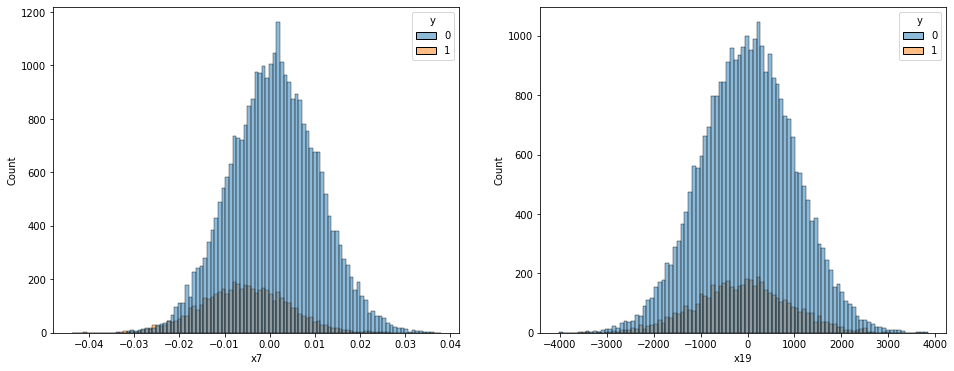

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = False, figsize = (16, 6))
sns.histplot(data = train_data_2[['x7', 'y']], x = 'x7', hue = 'y', ax = ax1)
sns.histplot(data = train_data_2[['x19', 'y']], x = 'x19', hue = 'y', ax = ax2)

##### Continuous Features x30, x44, and x57 -  >80% missing data
The distributions of features x30, x44, and x57 show enough variablilty and are not extremely skewed so imputing them might be reasonable. However, it is worth looking at an F-statistic of the reatures with respect to the target feature to determine if they are worth keeping. There are many other features to model with and with how much data is missing, imputation for these features might be worse. An ANOVA test does assume normally distributed data so x44 at least, and probably x57 too, should be transformed before testing.

<AxesSubplot:xlabel='x57', ylabel='Count'>

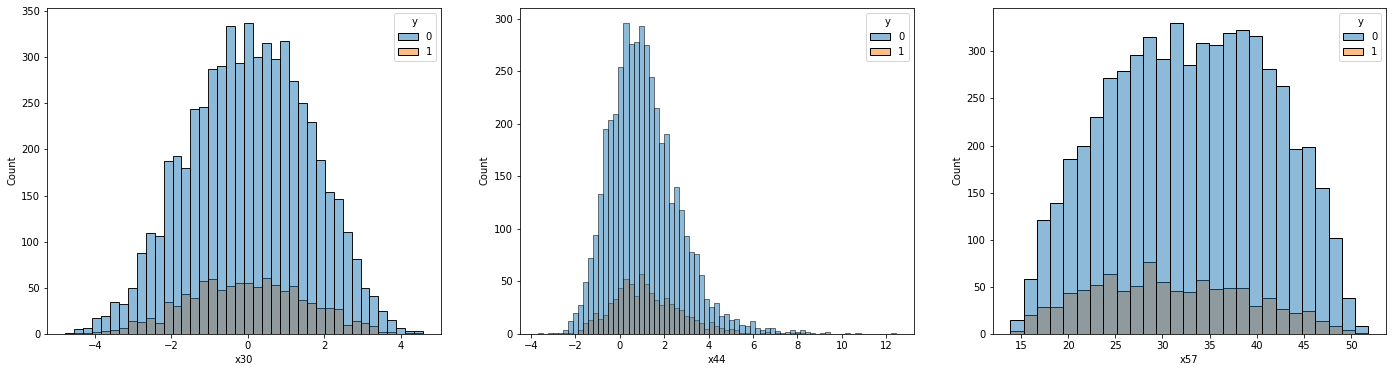

In [23]:
# x30, x44, and x57 - highly missing
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharex = False, sharey = False, figsize = (24, 6))
sns.histplot(data = train_data_2[['x30', 'y']], x = 'x30', hue = 'y', ax = ax1)
sns.histplot(data = train_data_2[['x44', 'y']], x = 'x44', hue = 'y', ax = ax2)
sns.histplot(data = train_data_2[['x57', 'y']], x = 'x57', hue = 'y', ax = ax3)

##### Continuous Features x30, x44, and x57 -  >40% missing data
The distributions of features x30, x44, and x57 show enough variablilty and are not extremely skewed so imputing them might be reasonable. However, it is worth looking at an F-statistic of the reatures with respect to the target feature to determine if they are worth keeping. An ANOVA test does assume normally distributed data so x55 should be transformed before testing.

<AxesSubplot:xlabel='x55', ylabel='Count'>

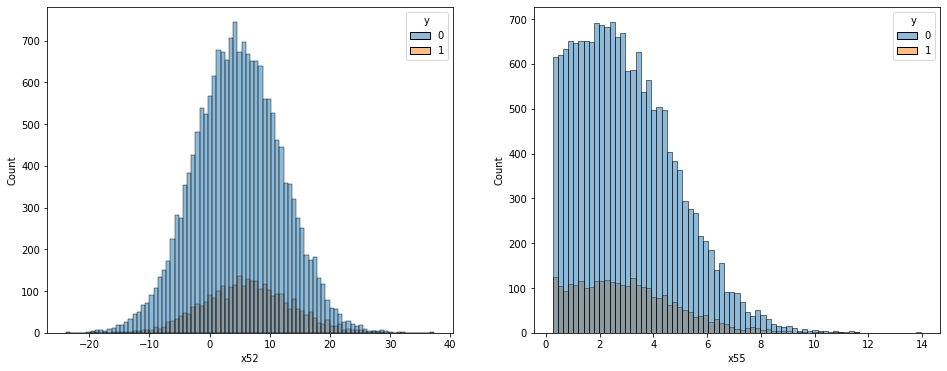

In [24]:
# x52 and x55 - moderately high missing
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = False, figsize = (16, 6))
sns.histplot(data = train_data_2[['x52', 'y']], x = 'x52', hue = 'y', ax = ax1)
sns.histplot(data = train_data_2[['x55', 'y']], x = 'x55', hue = 'y', ax = ax2)

##### Correlation for all Continuous Features
The heatmap shows there are quite a few features with a with moderate to high positive or negative correlation with at least one other feature. Due to the large volumne of features and time constraints it is not reasonable to check each individually, but rather using PCA or another dimmensionality technique may be appropriate to reduce the feature correlation and the number of continuous total features. If PCA is used, it also means that checking the f-statistic values of features to determine significance is not completely necessary. However, something to be aware of is that without completely jointly normally distributed data, is it not gauranteed that the pcincipal components will be independent. How negatively this could affect the logistic regression model depends on how correlated the principal components are.

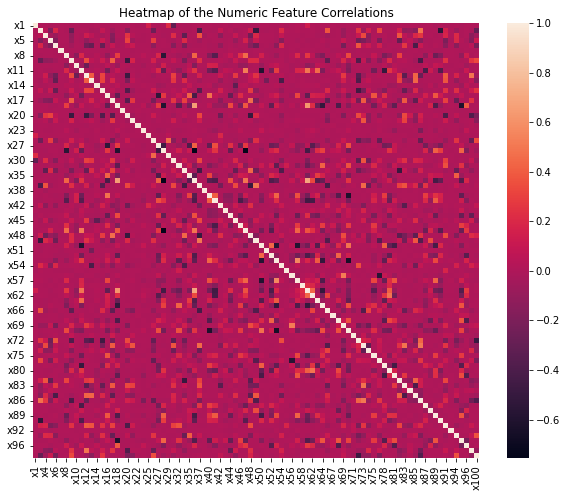

In [25]:
cont_feats_corr = train_data_2[cont_feats].corr()
fix, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(cont_feats_corr).set(title = 'Heatmap of the Numeric Feature Correlations')

##### Categorical Features x59, x98, x24, x31, x93, x99, x79 - Checking the categorical features with few classes first

The categories in features x59, x98, x24, x79, and x99 have very similar distributions for both categories 
of the target feature which suggests that they may not be particularly significant standalone features, 
however, they may be useful for interaction features.

The category distributions for feature x98 are also near a 50/50 split so this feature might not be particularly 
useful in any case.

The categoris for features x31 and x93 have different distributions for the categories of the target 
feature so these may be useful as standalong features as well as in interaction terms.

In [26]:
print(train_data_2.groupby(['y']).x59.value_counts(normalize = True, dropna = False), '\n')
print(train_data_2.groupby(['y']).x98.value_counts(normalize = True, dropna = False), '\n')
print(train_data_2.groupby(['y']).x24.value_counts(normalize = True, dropna = False), '\n')
print(train_data_2.groupby(['y']).x31.value_counts(normalize = True, dropna = False), '\n')
print(train_data_2.groupby(['y']).x93.value_counts(normalize = True, dropna = False), '\n')
print(train_data_2.groupby(['y']).x99.value_counts(normalize = True, dropna = False), '\n')
print(train_data_2.groupby(['y']).x79.value_counts(normalize = True, dropna = False), '\n')

y  x59
0  0      0.900770
   1      0.099230
1  0      0.903504
   1      0.096496
Name: x59, dtype: float64 

y  x98
0  1      0.500276
   0      0.499724
1  0      0.516944
   1      0.483056
Name: x98, dtype: float64 

y  x24   
0  female    0.453131
   male      0.449492
   other     0.097378
1  female    0.456443
   male      0.446870
   other     0.096688
Name: x24, dtype: float64 

y  x31
0  no     0.838353
   yes    0.161647
1  no     0.920352
   yes    0.079648
Name: x31, dtype: float64 

y  x93
0  no     0.877019
   yes    0.122981
1  no     0.950220
   yes    0.049780
Name: x93, dtype: float64 

y  x99    
0  yes        0.678071
   missing    0.321929
1  yes        0.689068
   missing    0.310932
Name: x99, dtype: float64 

y  x79    
0  1          0.844722
   0          0.094486
   missing    0.060792
1  1          0.841662
   0          0.096113
   missing    0.062225
Name: x79, dtype: float64 



##### Categorical Feature x3
While the differences between counts for the target class '1' do not vary as much (they are also generally much fewer because of the class imbalance), the differences in counts for the target class '0' do show moderate varition which suggests this feature, x3, might be useful as a standalone or interacction feature.

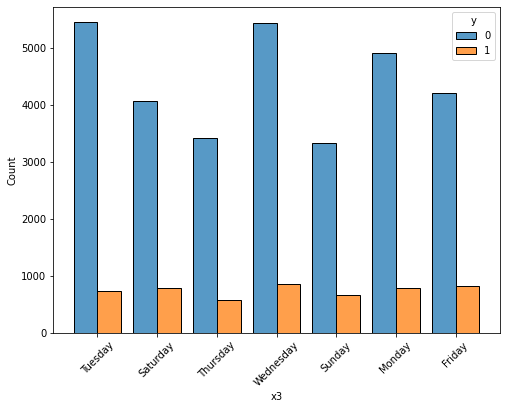

In [27]:
fix, ax = plt.subplots(figsize = (8, 6))
plt.xticks(rotation=45)
ax = sns.histplot(data = train_data_2[['x3', 'y']], x = 'x3', hue = 'y', multiple = 'dodge', shrink=.8)

##### Categorical Feature x33
Wow, lots of variation both in the categories of feature x33 and the categories with respect to the target feature. Much to work with here. Maybe need thresholding because some of the categories are very small. If the missing values are labeled as 'other', that category might dominate the feature because of it's size - look into further.

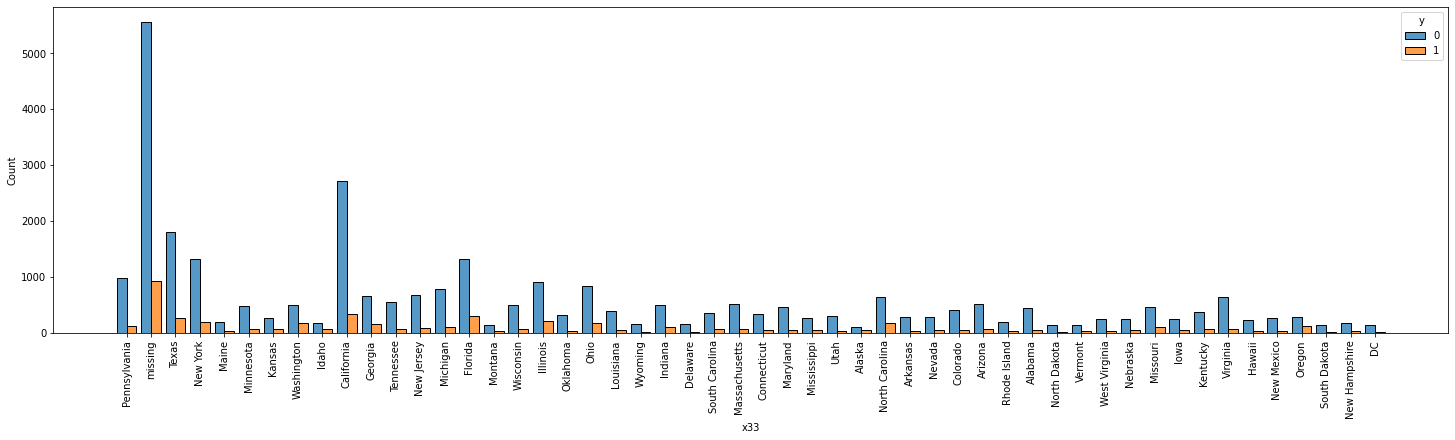

In [28]:
fix, ax = plt.subplots(figsize = (25,6))
plt.xticks(rotation=90)
ax = sns.histplot(data = train_data_2[['x33', 'y']], x = 'x33', hue = 'y', multiple = 'dodge', shrink=.8)

##### Categorical Feature x60
Cannot be directly determined from the graph whether the distributions of the x60 feature categories relative to the target feature categories are much different, but the distributions among the categories in the feature are. Something significant happens in December and January, and July and August.

In the following table, the feature category distributions with respect to the target category distributions appear to fall into three groups: a full percent below the whole data distribution for category '1', similar to the whole data distribution for category '1', and a nearly a full percent above the whole data distribution for category '1'. 

With these two things in mind, this feature could potentially create two more features.

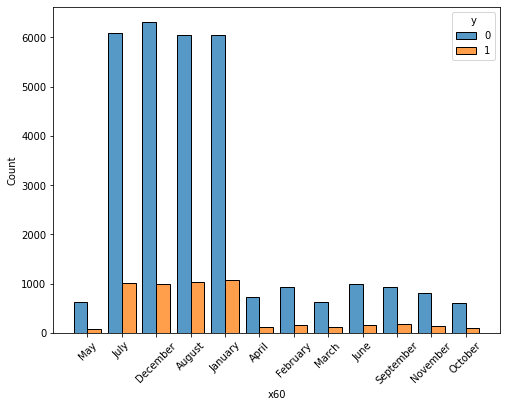

In [29]:
fix, ax = plt.subplots(figsize = (8, 6))
plt.xticks(rotation=45)
ax = sns.histplot(data = train_data_2[['x60', 'y']], x = 'x60', hue = 'y', multiple = 'dodge', shrink=.8)

In [30]:
print(train_data_2.groupby(['x60']).y.value_counts(normalize = True))

x60        y
April      0    0.850867
           1    0.149133
August     0    0.854764
           1    0.145236
December   0    0.862852
           1    0.137148
February   0    0.849817
           1    0.150183
January    0    0.848192
           1    0.151808
July       0    0.856500
           1    0.143500
June       0    0.863121
           1    0.136879
March      0    0.843243
           1    0.156757
May        0    0.874828
           1    0.125172
November   0    0.846555
           1    0.153445
October    0    0.847107
           1    0.152893
September  0    0.843525
           1    0.156475
Name: y, dtype: float64


##### Categorical Feature x65
Cannot be directly determined from the graph whether the distributions of the x65 feature categories relative to the target feature categories are much different, but the distributions among the categories in the feature are. While progressive and allstate are very similar and have the highest counts, esurance, geico, and farmers are significant lower. Not sure what to do with this yet, but should be useful.

In the following table, the feature category distributions with respect to the target category distributions appear appear to be mostly similar to the overall target distribution. Farmers is a little lower and progressive is a little higher with respect to target category '1', but this may or may not be useful.

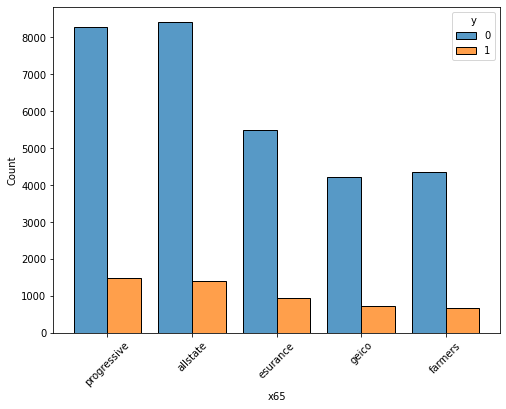

In [31]:
fix, ax = plt.subplots(figsize = (8, 6))
plt.xticks(rotation=45)
ax = sns.histplot(data = train_data_2[['x65', 'y']], x = 'x65', hue = 'y', multiple = 'dodge', shrink=.8)

In [32]:
print(train_data_2.groupby(['x65']).y.value_counts(normalize = True))

x65          y
allstate     0    0.857303
             1    0.142697
esurance     0    0.853962
             1    0.146038
farmers      0    0.864581
             1    0.135419
geico        0    0.854575
             1    0.145425
progressive  0    0.848320
             1    0.151680
Name: y, dtype: float64


##### Categorical Feature x77
The distribution of x77 feature categories varies greatly so this may be a useful feature, however, the variation for the category distributions with respect to the target categories is very small except for toyota' and 'mercedes'. Look into this further as an interaction term.

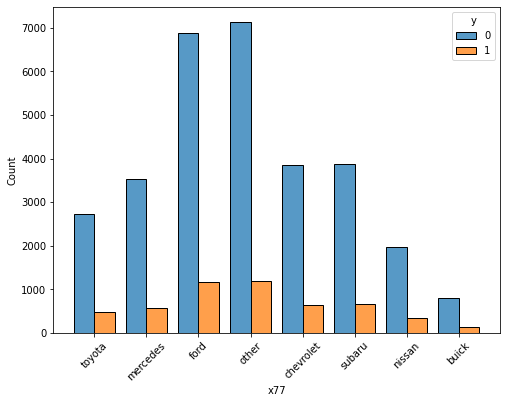

In [33]:
fix, ax = plt.subplots(figsize = (8, 6))
plt.xticks(rotation=45)
ax = sns.histplot(data = train_data_2[['x77', 'y']], x = 'x77', hue = 'y', multiple = 'dodge', shrink=.8)

In [34]:
print(train_data_2.groupby(['x77']).y.value_counts(normalize = True))

x77        y
buick      0    0.856237
           1    0.143763
chevrolet  0    0.854925
           1    0.145075
ford       0    0.853755
           1    0.146245
mercedes   0    0.861220
           1    0.138780
nissan     0    0.852827
           1    0.147173
other      0    0.856249
           1    0.143751
subaru     0    0.853712
           1    0.146288
toyota     0    0.849162
           1    0.150838
Name: y, dtype: float64


Futher feature interactions should be explored if time permits to determine if there are any additional interaction terms which could be created. Should also look at threshold encoding of categorical features because some of the categories in the multi-class features may not be significant and just add more terms and complexity to the final model. It would also be a good idea to test feature transformations on the continuous features because an assumption of logistic regression is that there is a linear relationship between the features and the logit of the target variable.

# Testing MICE for all Missing Data and PCA for Continuous Features

##### One-Hot Encoding Categorical Features

In [35]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
cat_feats.remove('x39')
ohe.fit(train_data_2[cat_feats])
ohe.categories_

[array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object),
 array(['female', 'male', 'other'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'DC', 'Delaware', 'Florida', 'Georgia',
        'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
        'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
        'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
        'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
        'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
        'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
        'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
        'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
        'missing'], dtype=object),
 

In [36]:
ohe_cat_data = pd.DataFrame(ohe.transform(train_data_2[cat_feats]).toarray())
ohe_cat_data.columns = ohe.get_feature_names_out(cat_feats)
ohe_cat_data.head()

,x59_0,x59_1,x98_0,x98_1,x3_Friday,x3_Monday,x3_Saturday,x3_Sunday,x3_Thursday,x3_Tuesday,x3_Wednesday,x24_female,x24_male,x24_other,x31_no,x31_yes,x33_Alabama,x33_Alaska,x33_Arizona,x33_Arkansas,x33_California,x33_Colorado,x33_Connecticut,x33_DC,x33_Delaware,x33_Florida,x33_Georgia,x33_Hawaii,x33_Idaho,x33_Illinois,x33_Indiana,x33_Iowa,x33_Kansas,x33_Kentucky,x33_Louisiana,x33_Maine,x33_Maryland,x33_Massachusetts,x33_Michigan,x33_Minnesota,x33_Mississippi,x33_Missouri,x33_Montana,x33_Nebraska,x33_Nevada,x33_New Hampshire,x33_New Jersey,x33_New Mexico,x33_New York,x33_North Carolina,x33_North Dakota,x33_Ohio,x33_Oklahoma,x33_Oregon,x33_Pennsylvania,x33_Rhode Island,x33_South Carolina,x33_South Dakota,x33_Tennessee,x33_Texas,x33_Utah,x33_Vermont,x33_Virginia,x33_Washington,x33_West Virginia,x33_Wisconsin,x33_Wyoming,x33_missing,x60_April,x60_August,x60_December,x60_February,x60_January,x60_July,x60_June,x60_March,x60_May,x60_November,x60_October,x60_September,x65_allstate,x65_esurance,x65_farmers,x65_geico,x65_progressive,x77_buick,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_other,x77_subaru,x77_toyota,x93_no,x93_yes,x99_missing,x99_yes,x79_0,x79_1,x79_missing
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Replacing the categorical features with the new OHE features. Drop the target feature from the data because we don not want the labels to affect the imputation.

In [37]:
train_data_3 = pd.concat([train_data_2.drop(columns = cat_feats).reset_index(drop = True), ohe_cat_data.reset_index(drop = True)], axis = 1)
train_data_3.head()

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x32,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x78,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100,x59_0,x59_1,x98_0,x98_1,x3_Friday,x3_Monday,x3_Saturday,x3_Sunday,x3_Thursday,x3_Tuesday,x3_Wednesday,x24_female,x24_male,x24_other,x31_no,x31_yes,x33_Alabama,x33_Alaska,x33_Arizona,x33_Arkansas,x33_California,x33_Colorado,x33_Connecticut,x33_DC,x33_Delaware,x33_Florida,x33_Georgia,x33_Hawaii,x33_Idaho,x33_Illinois,x33_Indiana,x33_Iowa,x33_Kansas,x33_Kentucky,x33_Louisiana,x33_Maine,x33_Maryland,x33_Massachusetts,x33_Michigan,x33_Minnesota,x33_Mississippi,x33_Missouri,x33_Montana,x33_Nebraska,x33_Nevada,x33_New Hampshire,x33_New Jersey,x33_New Mexico,x33_New York,x33_North Carolina,x33_North Dakota,x33_Ohio,x33_Oklahoma,x33_Oregon,x33_Pennsylvania,x33_Rhode Island,x33_South Carolina,x33_South Dakota,x33_Tennessee,x33_Texas,x33_Utah,x33_Vermont,x33_Virginia,x33_Washington,x33_West Virginia,x33_Wisconsin,x33_Wyoming,x33_missing,x60_April,x60_August,x60_December,x60_February,x60_January,x60_July,x60_June,x60_March,x60_May,x60_November,x60_October,x60_September,x65_allstate,x65_esurance,x65_farmers,x65_geico,x65_progressive,x77_buick,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_other,x77_subaru,x77_toyota,x93_no,x93_yes,x99_missing,x99_yes,x79_0,x79_1,x79_missing
0,0,2.093511,15.944546,-0.833525,-0.187597,-0.123068,0.0014,2.254477,5.903272,-0.435832,105.113663,8.130656,4.044516,NaN,-1.700120,101.150665,6.725310,72.969914,28.743163,4.509848,5.588753,78.595763,0.074902,4.767456,NaN,1030.388065,15.456618,1.787634,-0.770371,2.839116,52.124145,2.438034,65.745061,34.315772,0.866637,15.696982,NaN,-0.297078,0.355043,NaN,3.690136,0.004764,51.950419,60.535911,13.340835,2202.225863,0.322323,NaN,65.805278,NaN,NaN,1.657948,NaN,300.62999,6.381640,1.496535,2.670583,56.957730,-2.085659,14.402071,14.831743,1.525367,1.095279,-0.000234,50.455514,5.505352,-0.653204,3.268477,-2.582188,49.902042,9.123800,-0.674991,-4.914511,0.966014,2.138771,115.416021,44.060938,-0.951803,-1.448816,8.981868,4.791902,0.145109,NaN,NaN,0.689562,8.602414,11.534432,102.435231,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,3.401049,21.153929,-1.393378,1.167744,-0.371778,0.0047,0.997871,-0.075965,-0.865938,NaN,-0.919458,2.572974,-0.087837,-0.477766,100.932680,7.502045,75.256449,-713.471847,5.910495,3.908424,38.497828,-0.068747,3.657059,3.324094,901.103852,13.427370,2.747525,NaN,0.095499,55.357757,0.190277,72.913446,26.726763,27.775708,12.562015,97727.272470,1.515131,0.646213,NaN,NaN,1.622827,54.075747,59.113508,NaN,1845.988787,0.339258,-0.541251,71.342029,NaN,3.095479,-0.668177,42.530851,300.62999,15.750004,7.292398,1.009378,47.442542,0.959586,12.806170,18.353791,-1.145161,0.433329,-0.000234,54.919213,2.644344,-1.135460,-0.425561,NaN,51.040143,NaN,0.296739,-6.789857,2.580859,2.138771,89.695546,52.426658,-0.707732,0.667308,8.209927,1.844398,-1.118862,1.610899,2.903372,0.871425,9.955379,5.270090,104.366824,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,-0.093037,26.136908,1.758232,-1.240054,2.804161,-0.0050,-0.568251,1.406385,-1.44064

In [38]:
y_train = train_data_3['y']
train_data_3.drop(columns = ['y'], inplace = True)

##### Performing Multiple Imputation through Chained Equations (MICE)
Performed with scikit-learn's IterativeImputer. This is still in development and has a few bug, but usually works well. However, it cannot impute both categorical and continuous data at the same time. In this example it was easier to just manually replace the missing values in the categorical features with 'other' and 'missing', but further work could be done on this to also use a classification model to impute the categorical features.

In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Default max_iter = 10 and tol = 0.001 prevented convergence. Default n_nearest_features = None caused the 
# compute time for the iterations to take too long, however, using anything less that 40 - 50 features and it 
# wouldn't converge.
imp_mean = IterativeImputer(max_iter = 20, tol = 0.01, n_nearest_features = 50, random_state = 42, verbose = 1)

In [40]:
# print total missing
print('Missing: %d' % sum(train_data_3.isnull().sum()))
# fit on the dataset
imp_mean.fit(train_data_3)
# transform the dataset
train_data_3_trans = pd.DataFrame(imp_mean.transform(train_data_3))
# print total missing
print('Missing: %d' % sum(train_data_3_trans.isnull().sum()))

Missing: 304295
[IterativeImputer] Completing matrix with shape (36000, 187)
[IterativeImputer] Change: 4731.207835721646, scaled tolerance: 1054.43357829 
[IterativeImputer] Change: 886.0745329323605, scaled tolerance: 1054.43357829 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (36000, 187)
Missing: 0


In [41]:
train_data_3_trans.columns = imp_mean.feature_names_in_

In [42]:
train_data_3_trans.head()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x32,x34,x35,x36,x37,x38,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x61,x62,x63,x64,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x78,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100,x59_0,x59_1,x98_0,x98_1,x3_Friday,x3_Monday,x3_Saturday,x3_Sunday,x3_Thursday,x3_Tuesday,x3_Wednesday,x24_female,x24_male,x24_other,x31_no,x31_yes,x33_Alabama,x33_Alaska,x33_Arizona,x33_Arkansas,x33_California,x33_Colorado,x33_Connecticut,x33_DC,x33_Delaware,x33_Florida,x33_Georgia,x33_Hawaii,x33_Idaho,x33_Illinois,x33_Indiana,x33_Iowa,x33_Kansas,x33_Kentucky,x33_Louisiana,x33_Maine,x33_Maryland,x33_Massachusetts,x33_Michigan,x33_Minnesota,x33_Mississippi,x33_Missouri,x33_Montana,x33_Nebraska,x33_Nevada,x33_New Hampshire,x33_New Jersey,x33_New Mexico,x33_New York,x33_North Carolina,x33_North Dakota,x33_Ohio,x33_Oklahoma,x33_Oregon,x33_Pennsylvania,x33_Rhode Island,x33_South Carolina,x33_South Dakota,x33_Tennessee,x33_Texas,x33_Utah,x33_Vermont,x33_Virginia,x33_Washington,x33_West Virginia,x33_Wisconsin,x33_Wyoming,x33_missing,x60_April,x60_August,x60_December,x60_February,x60_January,x60_July,x60_June,x60_March,x60_May,x60_November,x60_October,x60_September,x65_allstate,x65_esurance,x65_farmers,x65_geico,x65_progressive,x77_buick,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_other,x77_subaru,x77_toyota,x93_no,x93_yes,x99_missing,x99_yes,x79_0,x79_1,x79_missing
0,2.093511,15.944546,-0.833525,-0.187597,-0.123068,0.0014,2.254477,5.903272,-0.435832,105.113663,8.130656,4.044516,-0.816084,-1.700120,101.150665,6.725310,72.969914,28.743163,4.509848,5.588753,78.595763,0.074902,4.767456,0.254332,1030.388065,15.456618,1.787634,-0.770371,2.839116,52.124145,2.438034,65.745061,34.315772,0.866637,15.696982,100129.565917,-0.297078,0.355043,-0.074971,3.690136,0.004764,51.950419,60.535911,13.340835,2202.225863,0.322323,8.380061,65.805278,-0.386721,3.122758,1.657948,30.568686,300.62999,6.381640,1.496535,2.670583,56.957730,-2.085659,14.402071,14.831743,1.525367,1.095279,-0.000234,50.455514,5.505352,-0.653204,3.268477,-2.582188,49.902042,9.123800,-0.674991,-4.914511,0.966014,2.138771,115.416021,44.060938,-0.951803,-1.448816,8.981868,4.791902,0.145109,3.924422,4.344529,0.689562,8.602414,11.534432,102.435231,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3.401049,21.153929,-1.393378,1.167744,-0.371778,0.0047,0.997871,-0.075965,-0.865938,109.948796,-0.919458,2.572974,-0.087837,-0.477766,100.932680,7.502045,75.256449,-713.471847,5.910495,3.908424,38.497828,-0.068747,3.657059,3.324094,901.103852,13.427370,2.747525,-2.335964,0.095499,55.357757,0.190277,72.913446,26.726763,27.775708,12.562015,97727.272470,1.515131,0.646213,1.048591,-0.492111,1.622827,54.075747,59.113508,8.663039,1845.988787,0.339258,-0.541251,71.342029,0.048815,3.095479,-0.668177,42.530851,300.62999,15.750004,7.292398,1.009378,47.442542,0.959586,12.806170,18.353791,-1.145161,0.433329,-0.000234,54.919213,2.644344,-1.135460,-0.425561,-0.886743,51.040143,14.032445,0.296739,-6.789857,2.580859,2.138771,89.695546,52.426658,-0.707732,0.667308,8.209927,1.844398,-1.118862,1.610899,2.903372,0.871425,9.955379,5.270090,104.366824,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,

In [43]:
transformed_data = pd.concat([train_data_3_trans, y_train], axis = 1)

From the graphs below, we can see the results of data imputation on the highest percentage missing data features (>80% missing). While x44 is right skewed, it is roughly normally distributed, and both x30 and x57 are also roughly normally distributed. Because of this, data imputation did quite well, as seen in the second row of graphs - the first row and second row look quite similar.

Text(0.5, 1.0, 'x57 After Imputation')

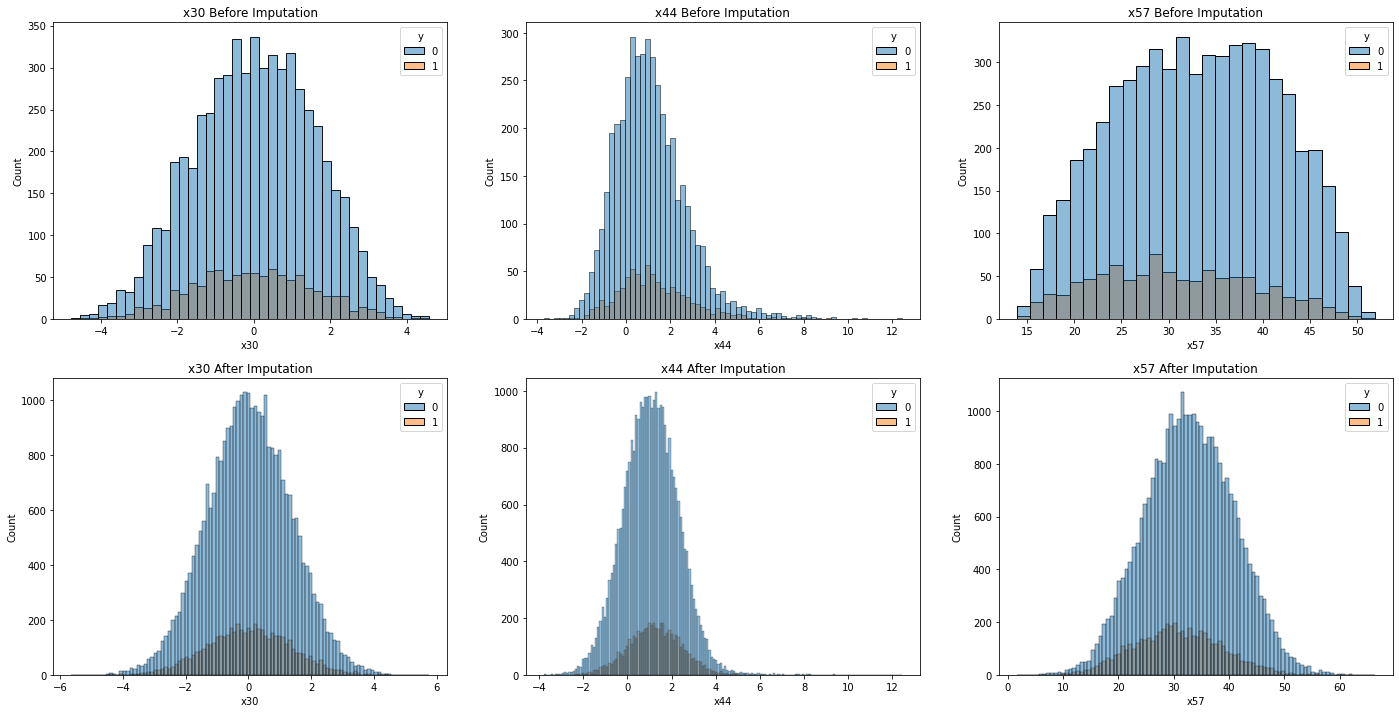

In [44]:
# x30, x44, x57 - very highly missing data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = False, figsize = (24, 12))
sns.histplot(data = train_data_2[['x30', 'y']], x = 'x30', hue = 'y', ax = ax1)
ax1.set_title('x30 Before Imputation')
sns.histplot(data = train_data_2[['x44', 'y']], x = 'x44', hue = 'y', ax = ax2)
ax2.set_title('x44 Before Imputation')
sns.histplot(data = train_data_2[['x57', 'y']], x = 'x57', hue = 'y', ax = ax3)
ax3.set_title('x57 Before Imputation')
sns.histplot(data = transformed_data[['x30', 'y']], x = 'x30', hue = 'y', ax = ax4)
ax4.set_title('x30 After Imputation')
sns.histplot(data = transformed_data[['x44', 'y']], x = 'x44', hue = 'y', ax = ax5)
ax5.set_title('x44 After Imputation')
sns.histplot(data = transformed_data[['x57', 'y']], x = 'x57', hue = 'y', ax = ax6)
ax6.set_title('x57 After Imputation')

While the iterative imputer does well when the non-missing data is normally distributed, it has severe issues when the data is non-normal. This is obvious in x55 below where the the imputer seems to have attempted to force the data to be normally distributed. The new distribution after imputation only really resembles the original distribution on the right half. Fixing this would require changing the estimator used for imputation, which defaults to BayesianRidge(). x55 might not be a great feature to use in the final model because the imputed distribution does not reflect the actual data distribution.

Text(0.5, 1.0, 'x55 After Imputation')

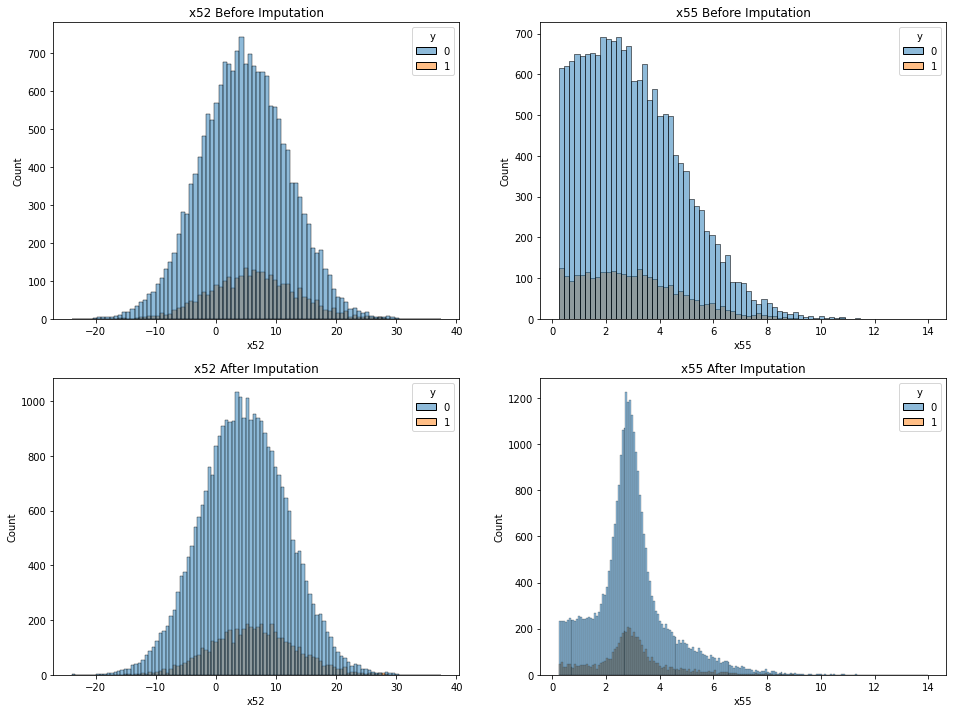

In [45]:
# x52 and x55 - moderately high missing
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, sharex = False, sharey = False, figsize = (16, 12))
sns.histplot(data = train_data_2[['x52', 'y']], x = 'x52', hue = 'y', ax = ax1)
ax1.set_title('x52 Before Imputation')
sns.histplot(data = train_data_2[['x55', 'y']], x = 'x55', hue = 'y', ax = ax2)
ax2.set_title('x55 Before Imputation')
sns.histplot(data = transformed_data[['x52', 'y']], x = 'x52', hue = 'y', ax = ax3)
ax3.set_title('x52 After Imputation')
sns.histplot(data = transformed_data[['x55', 'y']], x = 'x55', hue = 'y', ax = ax4)
ax4.set_title('x55 After Imputation')

##### Correlation for all Continuous Features After Imputation
The heatmap shows there are quite a few features with a with moderate to high positive or negative correlation with at least one other feature. Due to the large volumne of features and time constraints it is not reasonable to check each individually, but rather using PCA or another dimmensionality technique may be appropriate to reduce the feature correlation and the number of continuous total features. If PCA is used, it also means that checking the f-statistic values of features to determine significance is not completely necessary. However, something to be aware of is that without completely jointly normally distributed data, is it not gauranteed that the pcincipal components will be independent. How negatively this could affect the logistic regression model depends on how correlated the principal components are.

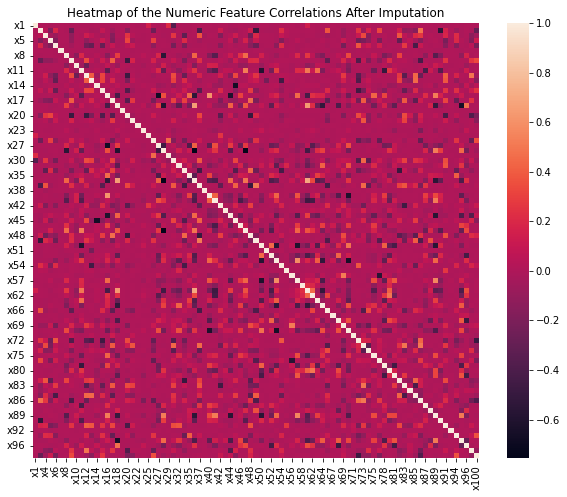

In [46]:
cont_feats_corr_trans = transformed_data[cont_feats].corr()
fix, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))
ax = sns.heatmap(cont_feats_corr_trans).set(title = 'Heatmap of the Numeric Feature Correlations After Imputation')

Using the number of medium to high correlations (feature to feature) per feature, the modeling feature set could be reduced. These highly correlated features may be useful, but they can also have a large impact on the variance inflation in the model which is a problem. Time permitting, select the continuous features which are less highly correlated with other features before being used in the model. If able to include this in the model pipeline process so that the correct features can be selected before modeling would be even better. However, using recursive feature elimination may also be appropriate but can be time consuming.

In [47]:
(np.abs(cont_feats_corr_trans) >= 0.5).sum().sort_values()

x1      1
x43     1
x46     1
x97     1
x51     1
       ..
x36     6
x28     6
x16     6
x18     7
x89    10
Length: 87, dtype: int64

In [48]:
summed_cont_feat_corr = pd.DataFrame(np.abs(cont_feats_corr_trans).sum())

### PCA - For Curiosity
PCA does reduce the overall continuous features from 89 to ~3, however, the class separation from the first 2 components is basically nonexistant. Also, most of the continuous features are moderately to heavily skewed or non-normal which can impact the colinearity reduction provided by PCA. Probably not appropriate to use without further testing.

In [49]:
# look at the feature kurtosis before sending it into PCA - it may or may not even be useful. Could also try TSNE
from scipy.stats import kurtosis, kurtosistest
transformed_cont_data = train_data_3_trans[cont_feats]
cont_feat_kurtosis = transformed_cont_data.apply(kurtosistest, nan_policy = 'omit').T.reset_index()
cont_feat_kurtosis.columns = ['features', 'z_score', 'p_value']
cont_feat_kurtosis[cont_feat_kurtosis.p_value <= 0.01]

,features,z_score,p_value
0,x1,6.901506,5.145423e-12
2,x4,-15.622296,5.132334e-55
3,x5,2.578625,9.919443e-03
7,x9,34.013792,1.393191e-253
10,x12,-218.434898,0.000000e+00
11,x13,39.093869,0.000000e+00
12,x14,15.386828,2.006292e-53
14,x16,-3.295982,9.807847e-04
16,x18,-344.419876,0.000000e+00
19,x21,82.518437,0.000000e+00


In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA()
components = pca.fit_transform(train_data_3_trans[cont_feats])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

[0.50402725 0.77397657 0.99648653]


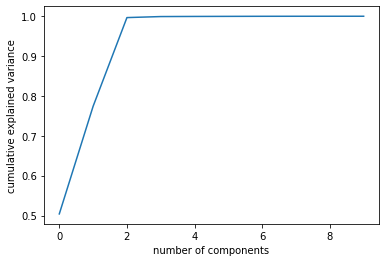

In [52]:
print(np.cumsum(pca.explained_variance_ratio_[:3]))
plt.plot(np.cumsum(pca.explained_variance_ratio_[:10]))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

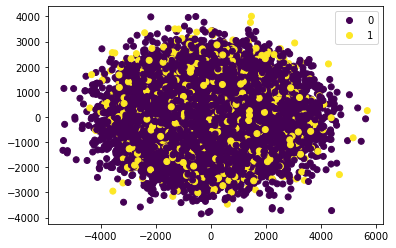

In [53]:
train_data_3_trans_2 = pca.fit_transform(train_data_3_trans)
plot = plt.scatter(train_data_3_trans_2[:,0], train_data_3_trans_2[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels=list(y_train.unique()))
plt.show()